<a href="https://colab.research.google.com/github/Manahil29/NIDS/blob/main/NIDS_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Problem Statement: The task is to build a network intrusion detector, a predictive model capable of distinguishing between bad connections, called intrusions or attacks, and good normal connections.

# **Exploratory Data Analysis**

## Importing required libraries and packages

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import itertools
import seaborn as sns
# import statsmodels.formula.api as sm
# from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices
from sklearn import datasets
from sklearn.feature_selection import RFE
import sklearn.metrics as metrics
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif, mutual_info_classif
from tabulate import tabulate

## Loading training and testing files

In [ ]:
train = pd.read_csv("/content/Train.csv")
test = pd.read_csv("/content/Test.csv")

In [ ]:
train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,last_flag
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [ ]:
test.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,last_flag
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
1,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal,21
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,saint,15
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,mscan,11


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  int64  
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_bytes                    125973 non-null  int64  
 5   dst_bytes                    125973 non-null  int64  
 6   land                         125973 non-null  int64  
 7   wrong_fragment               125973 non-null  int64  
 8   urgent                       125973 non-null  int64  
 9   hot                          125973 non-null  int64  
 10  num_failed_logins            125973 non-null  int64  
 11  logged_in                    125973 non-null  int64  
 12  num_compromised              125973 non-null  int64  
 13 

## Observing unique values in categorical variables

In [ ]:
print("PROTOCOL TYPES", train["protocol_type"].unique(), "\n")
print("SERVICE TYPES", train["service"].unique(), "\n")
print("FLAG TYPES", train["flag"].unique(), "\n")

PROTOCOL TYPES ['tcp' 'udp' 'icmp'] 

SERVICE TYPES ['ftp_data' 'other' 'private' 'http' 'remote_job' 'name' 'netbios_ns'
 'eco_i' 'mtp' 'telnet' 'finger' 'domain_u' 'supdup' 'uucp_path' 'Z39_50'
 'smtp' 'csnet_ns' 'uucp' 'netbios_dgm' 'urp_i' 'auth' 'domain' 'ftp'
 'bgp' 'ldap' 'ecr_i' 'gopher' 'vmnet' 'systat' 'http_443' 'efs' 'whois'
 'imap4' 'iso_tsap' 'echo' 'klogin' 'link' 'sunrpc' 'login' 'kshell'
 'sql_net' 'time' 'hostnames' 'exec' 'ntp_u' 'discard' 'nntp' 'courier'
 'ctf' 'ssh' 'daytime' 'shell' 'netstat' 'pop_3' 'nnsp' 'IRC' 'pop_2'
 'printer' 'tim_i' 'pm_dump' 'red_i' 'netbios_ssn' 'rje' 'X11' 'urh_i'
 'http_8001' 'aol' 'http_2784' 'tftp_u' 'harvest'] 

FLAG TYPES ['SF' 'S0' 'REJ' 'RSTR' 'SH' 'RSTO' 'S1' 'RSTOS0' 'S3' 'S2' 'OTH'] 



In [ ]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
duration,125973.0,287.144650,2.604515e+03,0.0,0.00,0.00,0.00,4.290800e+04
src_bytes,125973.0,45566.743000,5.870331e+06,0.0,0.00,44.00,276.00,1.379964e+09
dst_bytes,125973.0,19779.114421,4.021269e+06,0.0,0.00,0.00,516.00,1.309937e+09
land,125973.0,0.000198,1.408607e-02,0.0,0.00,0.00,0.00,1.000000e+00
wrong_fragment,125973.0,0.022687,2.535300e-01,0.0,0.00,0.00,0.00,3.000000e+00
urgent,125973.0,0.000111,1.436603e-02,0.0,0.00,0.00,0.00,3.000000e+00
hot,125973.0,0.204409,2.149968e+00,0.0,0.00,0.00,0.00,7.700000e+01
num_failed_logins,125973.0,0.001222,4.523914e-02,0.0,0.00,0.00,0.00,5.000000e+00
logged_in,125973.0,0.395736,4.890101e-01,0.0,0.00,0.00,1.00,1.000000e+00
num_compromised,125973.0,0.279250,2.394204e+01,0.0,0.00,0.00,0.00,7.479000e+03


In [ ]:
train.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', ' num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'attack', 'last_flag'],
      dtype='object')

## Missing value treatment

In [ ]:
train.isnull().value_counts()

duration  protocol_type  service  flag   src_bytes  dst_bytes  land   wrong_fragment  urgent  hot    num_failed_logins  logged_in  num_compromised  root_shell  su_attempted  num_root  num_file_creations   num_shells  num_access_files  num_outbound_cmds  is_host_login  is_guest_login  count  srv_count  serror_rate  srv_serror_rate  rerror_rate  srv_rerror_rate  same_srv_rate  diff_srv_rate  srv_diff_host_rate  dst_host_count  dst_host_srv_count  dst_host_same_srv_rate  dst_host_diff_srv_rate  dst_host_same_src_port_rate  dst_host_srv_diff_host_rate  dst_host_serror_rate  dst_host_srv_serror_rate  dst_host_rerror_rate  dst_host_srv_rerror_rate  attack  last_flag
False     False          False    False  False      False      False  False           False   False  False              False      False            False       False         False     False               False        False             False              False          False           False  False      False        False          

Since no missing value missing values treatment not included.

## Adding classification label "attack_class" in training examples


In [ ]:
# Adding classification label in training samples
train.loc[train.attack == "normal", "attack_class"] = 0

train.loc[
    (train.attack == "back")
    | (train.attack == "land")
    | (train.attack == "pod")
    | (train.attack == "neptune")
    | (train.attack == "smurf")
    | (train.attack == "teardrop")
    | (train.attack == "apache2")
    | (train.attack == "udpstorm")
    | (train.attack == "processtable")
    | (train.attack == "worm")
    | (train.attack == "mailbomb"),
    "attack_class",
] = 1  # 1 = DOS

train.loc[
    (train.attack == "satan")
    | (train.attack == "ipsweep")
    | (train.attack == "nmap")
    | (train.attack == "portsweep")
    | (train.attack == "mscan")
    | (train.attack == "saint"),
    "attack_class",
] = 2  # 2 = PROBE

train.loc[
    (train.attack == "guess_passwd")
    | (train.attack == "ftp_write")
    | (train.attack == "imap")
    | (train.attack == "phf")
    | (train.attack == "multihop")
    | (train.attack == "warezmaster")
    | (train.attack == "warezclient")
    | (train.attack == "spy")
    | (train.attack == "xlock")
    | (train.attack == "xsnoop")
    | (train.attack == "snmpguess")
    | (train.attack == "snmpgetattack")
    | (train.attack == "httptunnel")
    | (train.attack == "sendmail")
    | (train.attack == "named"),
    "attack_class",
] = 3  # 3 = R2L

train.loc[
    (train.attack == "buffer_overflow")
    | (train.attack == "loadmodule")
    | (train.attack == "rootkit")
    | (train.attack == "perl")
    | (train.attack == "sqlattack")
    | (train.attack == "xterm")
    | (train.attack == "ps"),
    "attack_class",
] = 4  # 4 = U2L

## Adding classification label "attack_class" in testing examples

In [ ]:
# Adding classification label in testing samples
test.loc[test.attack == "normal", "attack_class"] = 0

test.loc[
    (test.attack == "back")
    | (test.attack == "land")
    | (test.attack == "pod")
    | (test.attack == "neptune")
    | (test.attack == "smurf")
    | (test.attack == "teardrop")
    | (test.attack == "apache2")
    | (test.attack == "udpstorm")
    | (test.attack == "processtable")
    | (test.attack == "worm")
    | (test.attack == "mailbomb"),
    "attack_class",
] = 1  # 1 = DOS

test.loc[
    (test.attack == "satan")
    | (test.attack == "ipsweep")
    | (test.attack == "nmap")
    | (test.attack == "portsweep")
    | (test.attack == "mscan")
    | (test.attack == "saint"),
    "attack_class",
] = 2  # 2 = PROBE

test.loc[
    (test.attack == "guess_passwd")
    | (test.attack == "ftp_write")
    | (test.attack == "imap")
    | (test.attack == "phf")
    | (test.attack == "multihop")
    | (test.attack == "warezmaster")
    | (test.attack == "warezclient")
    | (test.attack == "spy")
    | (test.attack == "xlock")
    | (test.attack == "xsnoop")
    | (test.attack == "snmpguess")
    | (test.attack == "snmpgetattack")
    | (test.attack == "httptunnel")
    | (test.attack == "sendmail")
    | (test.attack == "named"),
    "attack_class",
] = 3  # 3 = R2L

test.loc[
    (test.attack == "buffer_overflow")
    | (test.attack == "loadmodule")
    | (test.attack == "rootkit")
    | (test.attack == "perl")
    | (test.attack == "sqlattack")
    | (test.attack == "xterm")
    | (test.attack == "ps"),
    "attack_class",
] = 4  # 4 = U2L

In [ ]:
print("Train shape:", train.shape)
print("Test shape:", test.shape)
print("Train Columns: ", train.columns)
print("Test Columns: ", test.columns)

Train shape: (125973, 44)
Test shape: (22544, 44)
Train Columns:  Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', ' num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'attack', 'last_flag', 'attack_class'],
      dtype='object')
Test Columns:  Index(['duration', 'protocol_type', '

BASIC EXPLORATORY DATA ANALYSIS

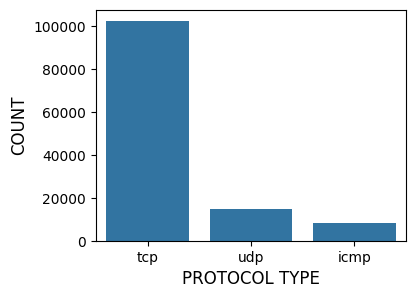

In [ ]:
# Protocol type distribution
plt.figure(figsize=(4, 3))
sns.countplot(x="protocol_type", data=train)
plt.xlabel("PROTOCOL TYPE", fontsize=12)
plt.ylabel("COUNT", fontsize=12)
plt.show()

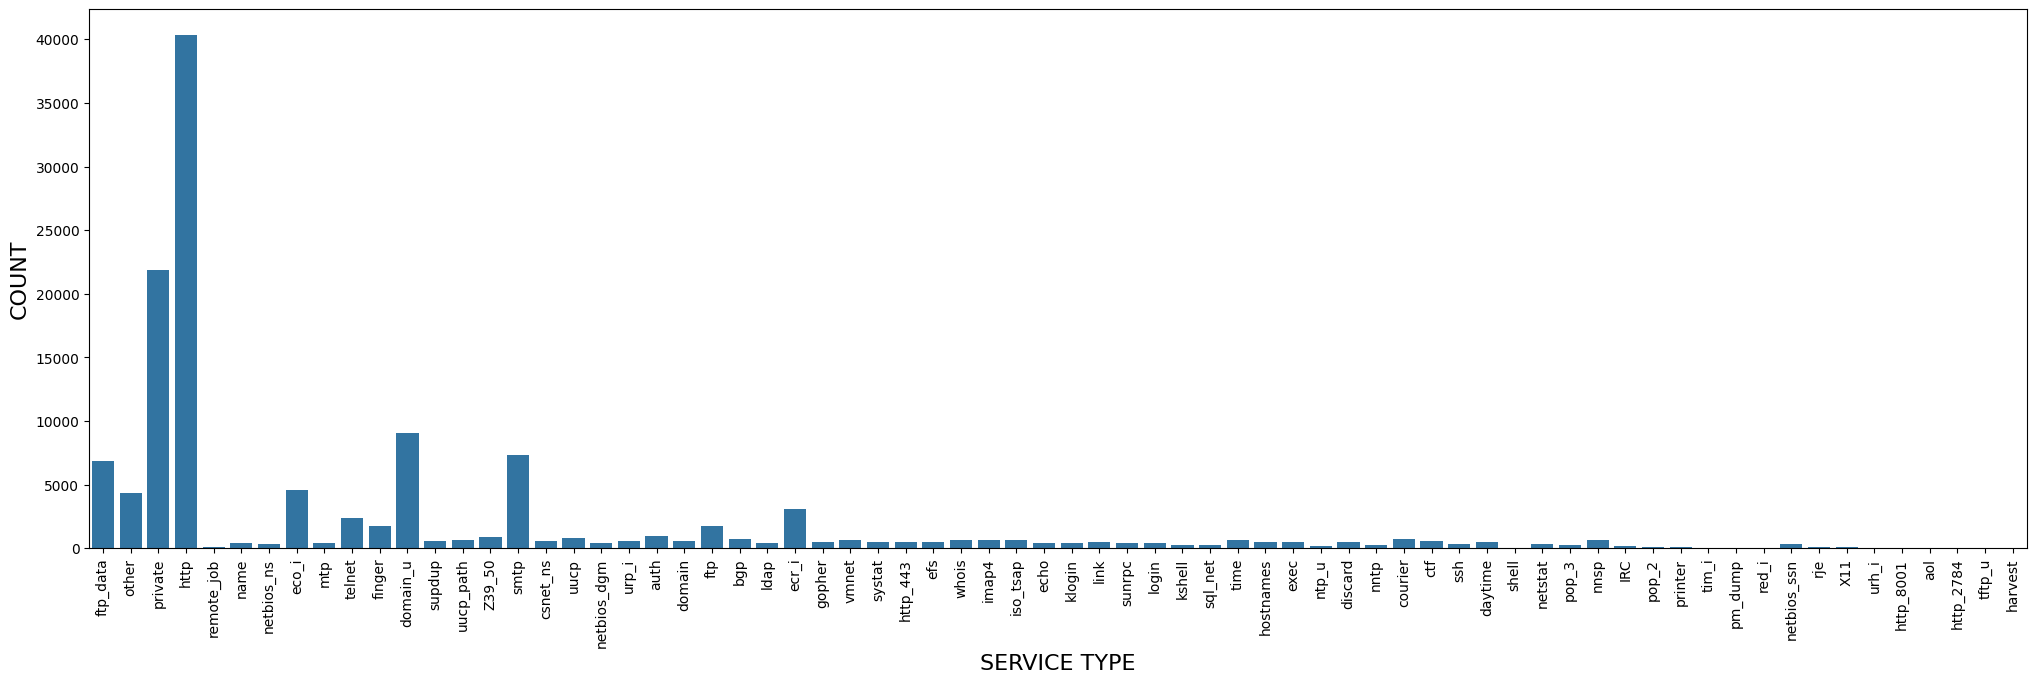

In [ ]:
# service distribution
plt.figure(figsize=(25, 7))
sns.countplot(x="service", data=train)
plt.xlabel("SERVICE TYPE", fontsize=16)
plt.ylabel("COUNT", fontsize=16)
plt.xticks(rotation=90)
plt.show()

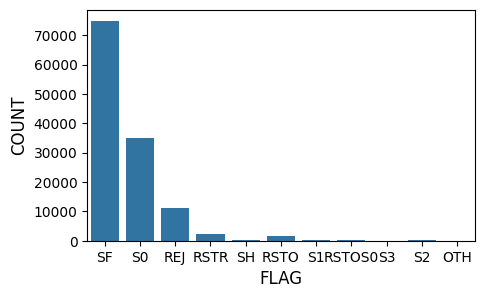

In [ ]:
# flag distribution
plt.figure(figsize=(5, 3))
sns.countplot(x="flag", data=train)
plt.xlabel("FLAG", fontsize=12)
plt.ylabel("COUNT", fontsize=12)
plt.show()

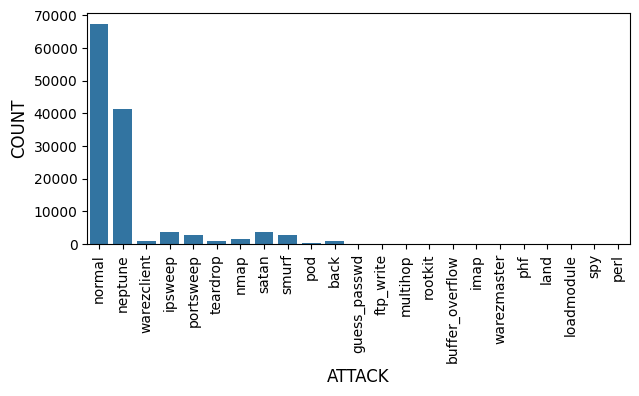

In [ ]:
# attack distribution
plt.figure(figsize=(7, 3))
sns.countplot(x="attack", data=train)
plt.xlabel("ATTACK", fontsize=12)
plt.ylabel("COUNT", fontsize=12)
plt.xticks(rotation=90)
plt.show()

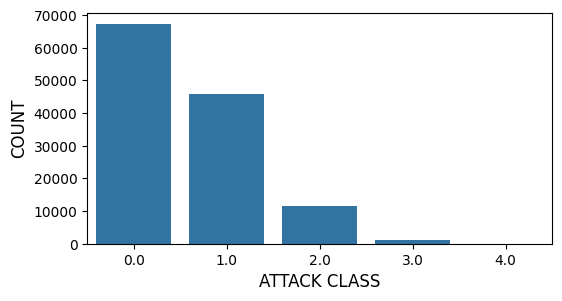

In [ ]:
# attack class distribution
plt.figure(figsize=(6, 3))
sns.countplot(x="attack_class", data=train)
plt.xlabel("ATTACK CLASS", fontsize=12)
plt.ylabel("COUNT", fontsize=12)
plt.show()

In [ ]:
numeric_columns = train.select_dtypes(include=[float, int]).columns
train.groupby("attack_class")[numeric_columns].mean().T.drop("attack_class")

attack_class,0.0,1.0,2.0,3.0,4.0
duration,168.587396,0.006227,2074.858185,633.417085,80.942308
src_bytes,13133.279331,1176.321162,385679.838367,307727.300503,906.230769
dst_bytes,4329.685223,169.201537,181074.911805,81822.026131,5141.961538
land,0.000104,0.000392,0.000000,0.000000,0.000000
wrong_fragment,0.000000,0.062229,0.000000,0.000000,0.000000
urgent,0.000148,0.000000,0.000000,0.003015,0.019231
hot,0.230655,0.039889,0.001630,8.334673,1.403846
num_failed_logins,0.001381,0.000000,0.000343,0.056281,0.019231
logged_in,0.710646,0.020837,0.007121,0.913568,0.884615
num_compromised,0.507076,0.019226,0.000601,0.077387,1.211538


## Separating numerical and categorical data

In [ ]:
numeric_var_names = [
    key
    for key in dict(train.dtypes)
    if dict(train.dtypes)[key] in ["float64", "int64", "float32", "int32"]
]
cat_var_names = [
    key for key in dict(train.dtypes) if dict(train.dtypes)[key] in ["object", "O"]
]
print("Numeric Variable", numeric_var_names)
print("Categorical Variable", cat_var_names)

Numeric Variable ['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', ' num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'last_flag', 'attack_class']
Categorical Variable ['protocol_type', 'service', 'flag', 'attack']


In [ ]:
train_num = train[numeric_var_names]
test_num = test[numeric_var_names]
train_cat = train[cat_var_names]
test_cat = test[cat_var_names]

## Handling outliers in numerical data

In [ ]:
def outlier_capping(x):
    x = x.clip(upper=x.quantile(0.99))
    x = x.clip(lower=x.quantile(0.01))
    return x


train_num = train_num.apply(outlier_capping)

## Creating dummy variables for categorical data

In [ ]:
# An utility function to create dummy variable
def create_dummies(df, colname):
    col_dummies = pd.get_dummies(
        df[colname], prefix=colname, drop_first=True, dtype=int
    )
    df = pd.concat([df, col_dummies], axis=1)
    df.drop(colname, axis=1, inplace=True)
    return df


# for c_feature in categorical_features
for c_feature in ["protocol_type", "service", "flag", "attack"]:
    train_cat = create_dummies(train_cat, c_feature)
    test_cat = create_dummies(test_cat, c_feature)
train_cat.head()

,protocol_type_tcp,protocol_type_udp,service_X11,service_Z39_50,service_aol,service_auth,service_bgp,service_courier,service_csnet_ns,service_ctf,...,attack_phf,attack_pod,attack_portsweep,attack_rootkit,attack_satan,attack_smurf,attack_spy,attack_teardrop,attack_warezclient,attack_warezmaster
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Concatenating numerical variables and new dummy variables into training and testing samples

In [ ]:
train = pd.concat([train_num, train_cat], axis=1)
test = pd.concat([test_num, test_cat], axis=1)

In [ ]:
correlation = train.corr()
correlation

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,attack_phf,attack_pod,attack_portsweep,attack_rootkit,attack_satan,attack_smurf,attack_spy,attack_teardrop,attack_warezclient,attack_warezmaster
duration,1.000000,0.011740,0.036892,NaN,NaN,NaN,0.021274,NaN,-0.064537,0.062081,...,-0.000757,-0.005534,0.408874,-0.000414,-0.023837,-0.020278,0.000605,-0.011691,0.037014,-0.001571
src_bytes,0.011740,1.000000,0.127827,NaN,NaN,NaN,0.379973,NaN,0.163275,0.603363,...,-0.000898,0.002845,-0.022114,-0.001067,-0.028784,-0.002928,-0.000555,-0.013779,0.047995,-0.002012
dst_bytes,0.036892,0.127827,1.000000,NaN,NaN,NaN,0.127002,NaN,0.422000,0.237363,...,0.010050,-0.014103,-0.053376,0.006873,-0.060373,-0.051675,-0.000156,-0.029791,-0.011541,0.064962
land,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wrong_fragment,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
attack_smurf,-0.020278,-0.002928,-0.051675,NaN,NaN,NaN,-0.020616,NaN,-0.118537,-0.014876,...,-0.000825,-0.005856,-0.022607,-0.001305,-0.025241,1.000000,-0.000584,-0.012370,-0.012356,-0.001846
attack_spy,0.000605,-0.000555,-0.000156,NaN,NaN,NaN,-0.000561,NaN,0.000850,-0.000405,...,-0.000022,-0.000159,-0.000615,-0.000036,-0.000687,-0.000584,1.000000,-0.000336,-0.000336,-0.000050
attack_teardrop,-0.011691,-0.013779,-0.029791,NaN,NaN,NaN,-0.011886,NaN,-0.068340,-0.008576,...,-0.000476,-0.003376,-0.013034,-0.000752,-0.014552,-0.012370,-0.000336,1.000000,-0.007123,-0.001064
attack_warezclient,0.037014,0.047995,-0.011541,NaN,NaN,NaN,0.270177,NaN,0.104233,-0.008567,...,-0.000475,-0.003372,-0.013019,-0.000752,-0.014536,-0.012356,-0.000336,-0.007123,1.000000,-0.001063


<Axes: >

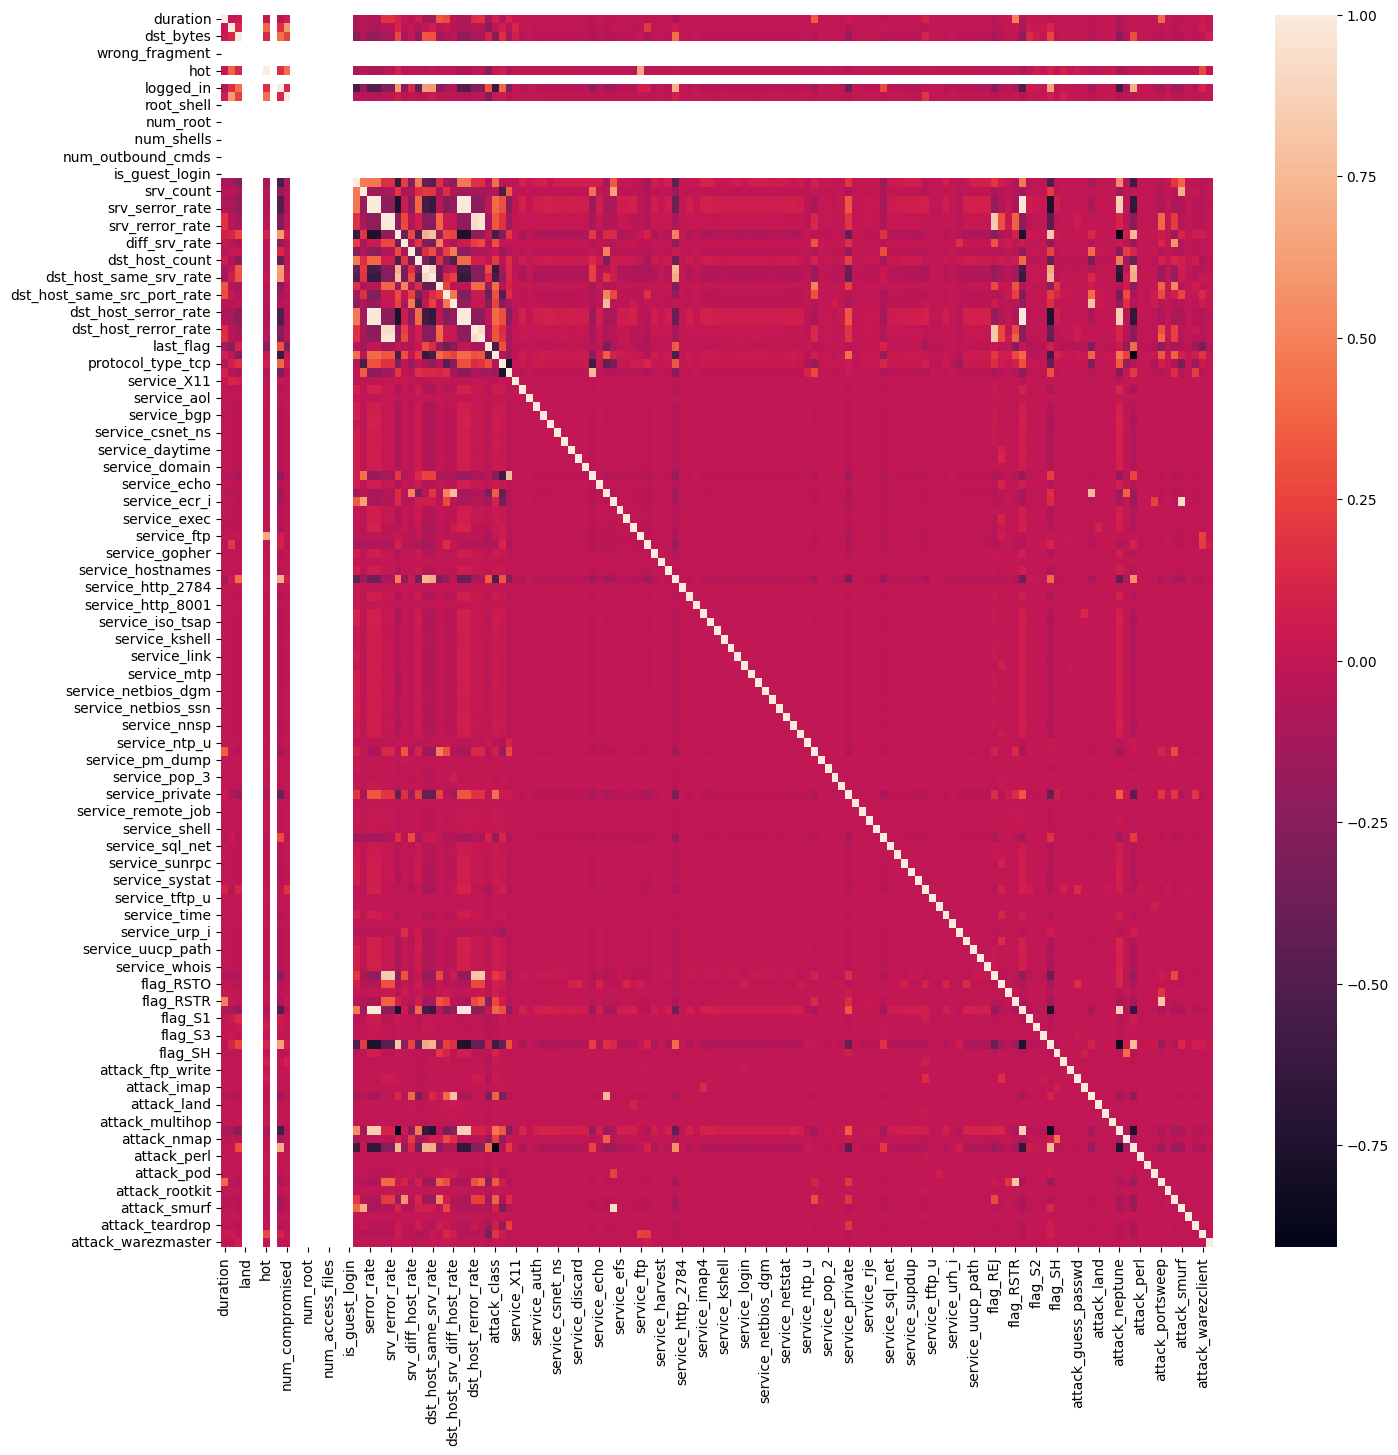

In [ ]:
plt.figure(figsize=(16, 16))
sns.heatmap(correlation)

In [ ]:
train.columns.values

array(['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment',
       'urgent', 'hot', 'num_failed_logins', 'logged_in',
       'num_compromised', 'root_shell', 'su_attempted', 'num_root',
       'num_file_creations', ' num_shells', 'num_access_files',
       'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count',
       'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate',
       'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate',
       'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
       'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
       'dst_host_serror_rate', 'dst_host_srv_serror_rate',
       'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'last_flag',
       'attack_class', 'protocol_type_tcp', 'protocol_type_udp',
       'service_X11', 'service_Z39_50', 'service_aol', 'service_auth',
       'service_bgp', 'service_courier', 'service_csnet_ns',
       'servi

## Eliminating variables having low variance and high correlation

In [ ]:
train.drop(
    columns=[
        "land",
        "wrong_fragment",
        "urgent",
        "num_failed_logins",
        "root_shell",
        "su_attempted",
        "num_root",
        "num_file_creations",
        " num_shells",
        "num_access_files",
        "num_outbound_cmds",
        "is_host_login",
        "is_guest_login",
        "dst_host_rerror_rate",
        "dst_host_serror_rate",
        "dst_host_srv_rerror_rate",
        "dst_host_srv_serror_rate",
        "num_outbound_cmds",
        "srv_rerror_rate",
        "srv_serror_rate",
    ],
    axis=1,
    inplace=True,
)

<Axes: >

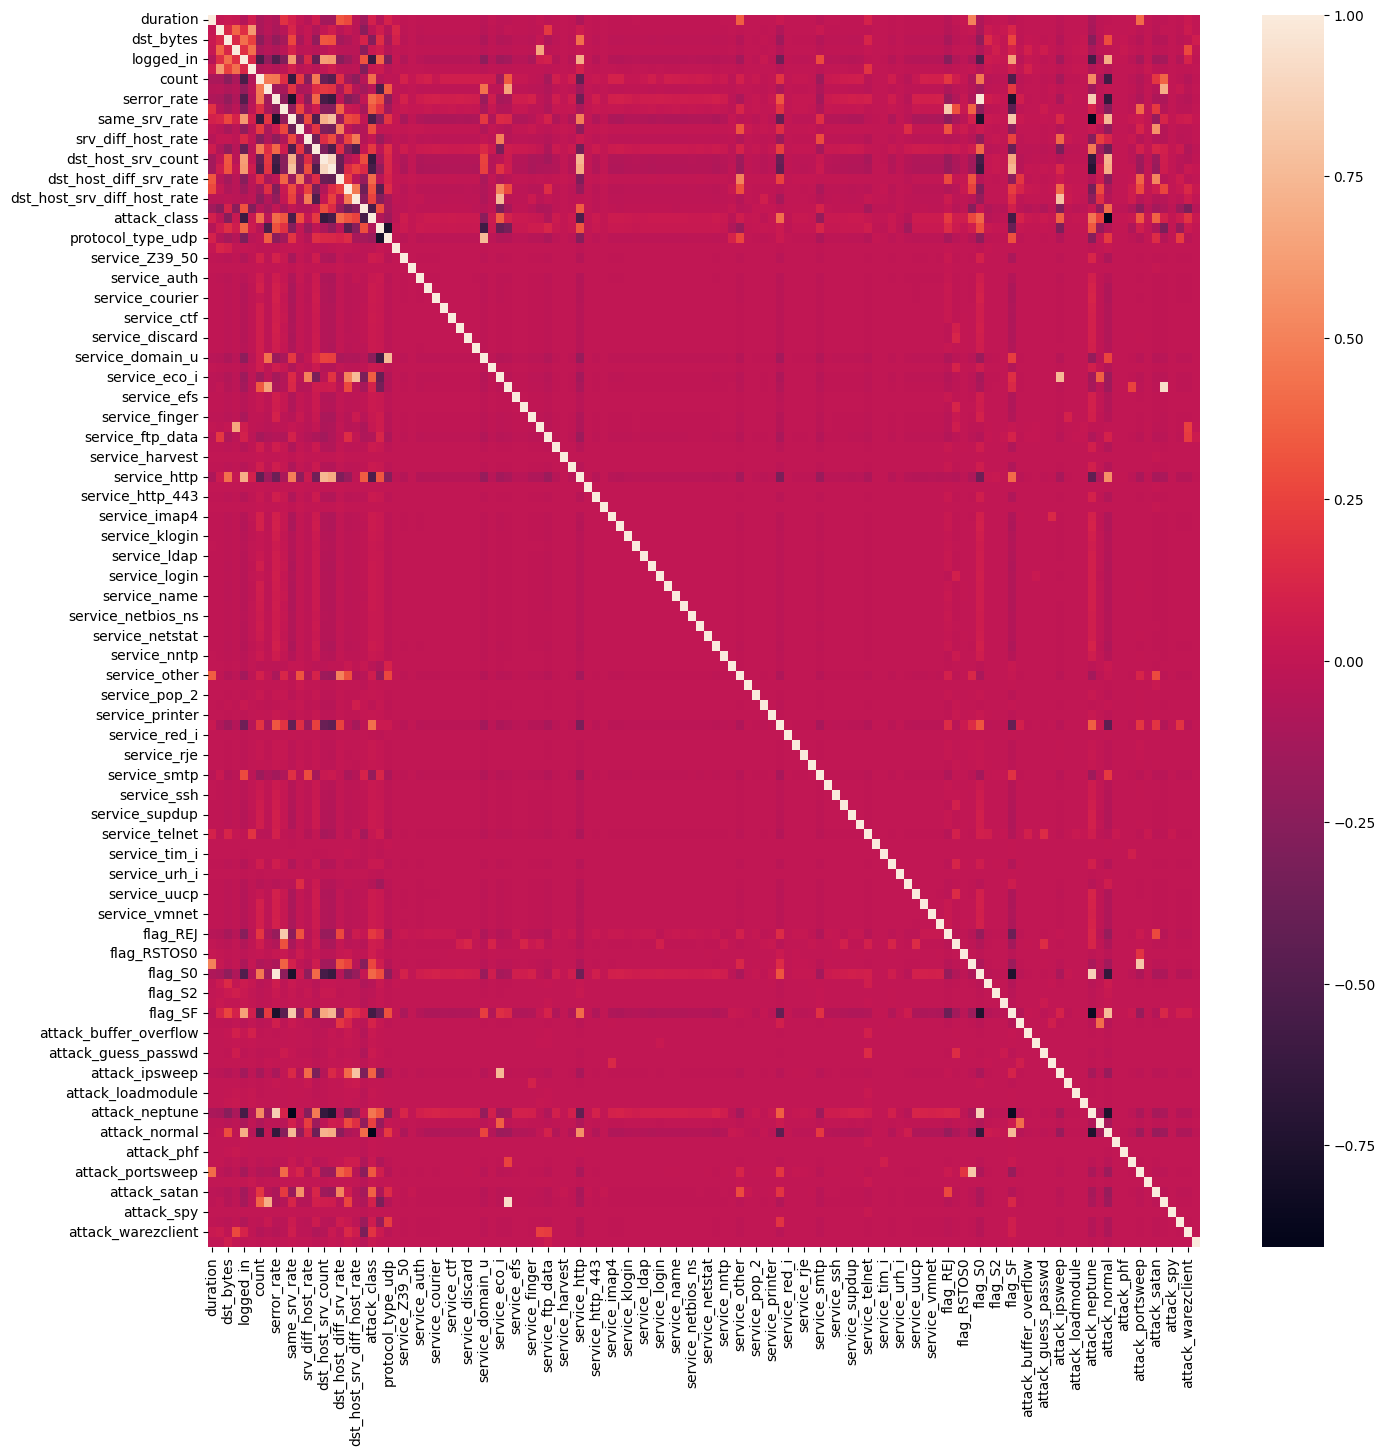

In [ ]:
plt.figure(figsize=(16, 16))
sns.heatmap(train.corr())

## Selecting KBest variables for model building and further prediction.

In [ ]:
X = train[train.columns.difference(["attack_class"])]
X_new = SelectKBest(f_classif, k=15).fit(X, train["attack_class"])


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


In [ ]:
X_new.get_support()

array([False, False, False, False, False, False, False, False,  True,
       False,  True, False, False, False, False, False,  True, False,
       False, False, False, False,  True, False, False, False,  True,
        True,  True,  True, False, False, False, False, False, False,
        True, False, False, False,  True, False, False,  True,  True,
       False, False, False, False,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False])

In [ ]:
KBest_features = X.columns[X_new.get_support()]
KBest_features

Index(['attack_neptune', 'attack_normal', 'attack_satan', 'count',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_same_srv_rate', 'dst_host_srv_count', 'flag_S0', 'flag_SF',
       'last_flag', 'logged_in', 'same_srv_rate', 'serror_rate',
       'service_http'],
      dtype='object')

In [ ]:
features = [
    "attack_neptune",
    "attack_normal",
    "attack_satan",
    "count",
    "dst_host_diff_srv_rate",
    "dst_host_same_src_port_rate",
    "dst_host_same_srv_rate",
    "dst_host_srv_count",
    "flag_S0",
    "flag_SF",
    "last_flag",
    "logged_in",
    "same_srv_rate",
    "serror_rate",
    "service_http",
]
X_train = train[features]
y_train = train["attack_class"]
X_test = test[features]
y_test = test["attack_class"]

# **Multi Layer Perceptron**

## MLP using python package

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

scaler = StandardScaler()
# Fit only to the training data
scaler.fit(X_train)

StandardScaler()

In [ ]:
# Now apply the transformations to the data:
train_X = scaler.transform(X_train)
test_X = scaler.transform(X_test)

In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=(30, 30, 30))
mlp.fit(train_X, y_train)

MLPClassifier(hidden_layer_sizes=(30, 30, 30))

In [ ]:
y_pred = mlp.predict(test_X)
y_pred

array([1., 1., 0., ..., 1., 0., 2.])

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test, y_pred))

[[9700    0   11    0    0]
 [   0 6741  719    0    0]
 [   0  168 2253    0    0]
 [   0  320 2565    0    0]
 [   0    0   67    0    0]]


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      9711
         1.0       0.93      0.90      0.92      7460
         2.0       0.40      0.93      0.56      2421
         3.0       0.00      0.00      0.00      2885
         4.0       0.00      0.00      0.00        67

    accuracy                           0.83     22544
   macro avg       0.47      0.57      0.50     22544
weighted avg       0.78      0.83      0.79     22544



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
mlp.coefs_

[array([[ 6.26668768e-01, -2.39741984e-01,  4.88934154e-02,
          2.87128921e-02,  3.75505415e-01,  3.36600857e-01,
         -2.73697985e-01,  3.96931021e-01, -3.09273755e-01,
         -3.25298894e-01,  1.58528487e-02,  2.20296532e-01,
          5.13903594e-04,  7.69230340e-02,  3.15360551e-01,
         -2.97072506e-01,  2.14712700e-01, -3.14314015e-01,
         -4.72899159e-02, -4.82875192e-01,  3.18300458e-01,
          2.36704377e-02,  7.71843603e-02,  1.91105701e-01,
         -4.69843003e-01, -2.42470254e-02,  7.44462269e-03,
         -3.71848255e-01,  3.45222321e-01,  3.01335024e-01],
        [ 3.75569150e-01,  7.44346604e-02,  4.72394914e-01,
         -2.99499162e-01,  1.62277875e-01, -2.28164610e-01,
          1.16437745e-01, -1.47889047e-01,  2.84094237e-01,
          4.31408190e-01, -1.17675666e-01, -2.16986172e-01,
         -4.19607712e-02,  2.36024753e-03, -2.53195479e-01,
          2.49924347e-01,  6.98643693e-01, -3.90225951e-01,
          5.95207373e-01,  4.67250739e-

In [ ]:
accuracy_score(y_test, y_pred)

0.8292228530872959

### **Classification Report of MLP**

In [ ]:
# Calculate the metrics
classification_report = metrics.classification_report(y_test, y_pred, output_dict=True, zero_division=0)
report_df = pd.DataFrame(classification_report).transpose()

# Print the metrics
print("Classification Report:")
print(tabulate(report_df, headers='keys', tablefmt='pretty'))

Classification Report:
+--------------+---------------------+--------------------+--------------------+--------------------+
|              |      precision      |       recall       |      f1-score      |      support       |
+--------------+---------------------+--------------------+--------------------+--------------------+
|     0.0      |         1.0         | 0.9988672639275049 | 0.9994333110092216 |       9711.0       |
|     1.0      | 0.9324941209019229  | 0.9036193029490617 | 0.9178296684593914 |       7460.0       |
|     2.0      |  0.401246660730187  | 0.9306071871127634 | 0.5607267297162768 |       2421.0       |
|     3.0      |         0.0         |        0.0         |        0.0         |       2885.0       |
|     4.0      |         0.0         |        0.0         |        0.0         |        67.0        |
|   accuracy   | 0.8292228530872959  | 0.8292228530872959 | 0.8292228530872959 | 0.8292228530872959 |
|  macro avg   | 0.46674815632642197 | 0.5666187507978659 |

## MLP without python package.

In [ ]:
class MLP:
    def __init__(self, hidden_layer_sizes, learning_rate=0.01, num_iterations=1000):
        self.hidden_layer_sizes = hidden_layer_sizes
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.parameters = {}

    def sigmoid(self, z):
        z = np.clip(z, -500, 500)  # Clip values to avoid overflow
        return 1 / (1 + np.exp(-z))

    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def initialize_parameters(self, input_size, output_size):
        layer_sizes = [input_size] + self.hidden_layer_sizes + [output_size]

        for i in range(1, len(layer_sizes)):
            self.parameters['W' + str(i)] = np.random.randn(layer_sizes[i-1], layer_sizes[i])
            self.parameters['b' + str(i)] = np.zeros((1, layer_sizes[i]))

    def forward_propagation(self, X):
        cache = {'A0': X}

        L = len(self.parameters) // 2
        for i in range(1, L + 1):
            Z = np.dot(cache['A' + str(i-1)], self.parameters['W' + str(i)]) + self.parameters['b' + str(i)]
            A = self.sigmoid(Z)
            cache['Z' + str(i)] = Z
            cache['A' + str(i)] = A

        return cache

    def compute_cost(self, Y, AL):
        m = Y.shape[0]
        cost = -np.sum(Y * np.log(AL) + (1 - Y) * np.log(1 - AL)) / m
        return cost

    def backward_propagation(self, cache, Y):
        gradients = {}
        L = len(self.parameters) // 2
        m = Y.shape[0]

        cache['A' + str(L)] -= Y
        for i in reversed(range(1, L + 1)):
            gradients['dW' + str(i)] = np.dot(cache['A' + str(i-1)].T, cache['A' + str(i)]) / m
            gradients['db' + str(i)] = np.sum(cache['A' + str(i)], axis=0, keepdims=True) / m
            if i > 1:
                cache['A' + str(i-1)] = np.dot(cache['A' + str(i)], self.parameters['W' + str(i)].T) * self.sigmoid_derivative(cache['A' + str(i-1)])

        return gradients

    def update_parameters(self, gradients):
        L = len(self.parameters) // 2
        for i in range(1, L + 1):
            self.parameters['W' + str(i)] -= self.learning_rate * gradients['dW' + str(i)]
            self.parameters['b' + str(i)] -= self.learning_rate * gradients['db' + str(i)]

    def fit(self, X, Y):
        input_size = X.shape[1]
        output_size = Y.shape[1]
        self.initialize_parameters(input_size, output_size)

        for i in range(self.num_iterations):
            cache = self.forward_propagation(X)
            cost = self.compute_cost(Y, cache['A' + str(len(self.hidden_layer_sizes) + 1)])
            gradients = self.backward_propagation(cache, Y)
            self.update_parameters(gradients)

            # if i % 100 == 0:
            #     print(f"Iteration {i}, cost: {cost}")

    def predict(self, X):
        cache = self.forward_propagation(X)
        predictions = cache['A' + str(len(self.parameters) // 2)]
        return np.round(predictions)

# Convert labels to one-hot encoding
def to_one_hot(y, num_classes):
    return np.eye(num_classes)[y]

In [ ]:
y_train_one_hot = to_one_hot(train["attack_class"].astype(int), num_classes=5)

hidden_layer_sizes = [30, 30, 30]
mlp = MLP(hidden_layer_sizes, learning_rate=0.01, num_iterations=1000)
mlp.fit(train_X, y_train_one_hot)

y_pred = mlp.predict(test_X)
y_pred_classes = np.argmax(y_pred, axis=1)



In [ ]:
print(f"Accuracy: {accuracy_score(y_test, y_pred_classes)}")

Accuracy: 0.6355571327182399


### **Classification Report of MLP without python package**

In [ ]:
# Calculate the metrics
classification_report = metrics.classification_report(y_test, y_pred, output_dict=True, zero_division=1)
report_df = pd.DataFrame(classification_report).transpose()

# Print the metrics
print("Classification Report:")
print(tabulate(report_df, headers='keys', tablefmt='pretty'))

Classification Report:
+--------------+--------------------+---------------------+---------------------+--------------------+
|              |     precision      |       recall        |      f1-score       |      support       |
+--------------+--------------------+---------------------+---------------------+--------------------+
|     0.0      | 0.6256208119826567 | 0.8172175883019257  | 0.7086979817824612  |       9711.0       |
|     1.0      | 0.5477228927883152 | 0.7238605898123325  | 0.6235925861770311  |       7460.0       |
|     2.0      |        1.0         |         0.0         |         0.0         |       2421.0       |
|     3.0      |        1.0         |         0.0         |         0.0         |       2885.0       |
|     4.0      |        1.0         |         0.0         |         0.0         |        67.0        |
|   accuracy   | 0.5915542938254081 | 0.5915542938254081  | 0.5915542938254081  | 0.5915542938254081 |
|  macro avg   | 0.8346687409541943 | 0.3082156356

# **Decison Trees**

## Decision trees using python package.

In [ ]:
#importing relevant libraries
from sklearn.model_selection import cross_val_score
from sklearn import metrics
import sklearn.tree as dt
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.model_selection import GridSearchCV

In [ ]:
# Train the classifier using the training data (features and labels).
clf_tree = DecisionTreeClassifier( max_depth = 5)
clf_tree=clf_tree.fit( X_train, y_train )

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.5915542938254081

In [ ]:
#defining the range from 3-8
param_grid = {'max_depth': np.arange(3, 9),
             'max_features': np.arange(3,9)}

In [ ]:
# Train the decision tree model using the training data and find the best hyperparameters.
tree = GridSearchCV(DecisionTreeClassifier(), param_grid, cv = 5)
tree.fit( X_train, y_train )

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': array([3, 4, 5, 6, 7, 8]),
                         'max_features': array([3, 4, 5, 6, 7, 8])})

In [ ]:
tree.best_score_

0.9982377115559838

In [ ]:
tree.best_estimator_

DecisionTreeClassifier(max_depth=8, max_features=7)

In [ ]:
tree.best_params_

{'max_depth': 8, 'max_features': 7}

In [ ]:
# Train the decision tree classifier using the training data (features and labels).
clf_tree = DecisionTreeClassifier( max_depth = 8, max_features=8 )
clf_tree.fit( X_train, y_train )

DecisionTreeClassifier(max_depth=8, max_features=8)

In [ ]:
clf_tree.feature_importances_

array([1.81725695e-01, 7.26083261e-01, 5.18038389e-03, 2.61454968e-02,
       6.12101680e-04, 3.81819000e-04, 2.87427657e-04, 2.70667989e-03,
       2.06630933e-04, 0.00000000e+00, 4.72178942e-05, 0.00000000e+00,
       4.96204094e-02, 5.57462159e-05, 6.94713099e-03])

In [ ]:
import itertools

# Assuming feature_names is a list of feature names
feature_names = [...]  # list of feature names
feature_map = [(i, v) for i, v in itertools.zip_longest(feature_names, clf_tree.feature_importances_)]

feature_map


[(Ellipsis, 0.18172569511130413),
 (None, 0.7260832606036395),
 (None, 0.00518038389093961),
 (None, 0.026145496774667328),
 (None, 0.0006121016795986597),
 (None, 0.0003818190004257772),
 (None, 0.00028742765698985394),
 (None, 0.002706679890258024),
 (None, 0.00020663093289262238),
 (None, 0.0),
 (None, 4.7217894178564396e-05),
 (None, 0.0),
 (None, 0.04962040936070144),
 (None, 5.574621586830172e-05),
 (None, 0.0069471309885362625)]

In [ ]:
Feature_importance = pd.DataFrame(feature_map, columns=['Feature', 'importance'])
Feature_importance.sort_values('importance', inplace=True, ascending=False)
Feature_importance

,Feature,importance
1,None,0.726083
0,Ellipsis,0.181726
12,None,0.049620
3,None,0.026145
14,None,0.006947
2,None,0.005180
7,None,0.002707
4,None,0.000612
5,None,0.000382
6,None,0.000287


In [ ]:
tree_test_pred = pd.DataFrame( { 'actual':  y_test,
                            'predicted': clf_tree.predict( X_test ) } )

In [ ]:
tree_test_pred.sample( n = 10 )

,actual,predicted
8756,0.0,0.0
16413,2.0,1.0
14480,0.0,0.0
4313,0.0,0.0
6404,1.0,2.0
3309,1.0,1.0
21539,3.0,1.0
18816,3.0,2.0
4392,3.0,2.0
10468,2.0,2.0


In [ ]:
accuracy_score( tree_test_pred.actual, tree_test_pred.predicted )

0.7871717530163236

### **Classification Report of Decision Tree**

In [ ]:
# Calculate the metrics
classification_report = metrics.classification_report(y_test, y_pred, output_dict=True, zero_division=0)
report_df = pd.DataFrame(classification_report).transpose()

# Print the metrics
print("Classification Report:")
print(tabulate(report_df, headers='keys', tablefmt='pretty'))

Classification Report:
+--------------+---------------------+---------------------+---------------------+--------------------+
|              |      precision      |       recall        |      f1-score       |      support       |
+--------------+---------------------+---------------------+---------------------+--------------------+
|     0.0      | 0.6256208119826567  | 0.8172175883019257  | 0.7086979817824612  |       9711.0       |
|     1.0      | 0.5477228927883152  | 0.7238605898123325  | 0.6235925861770311  |       7460.0       |
|     2.0      |         0.0         |         0.0         |         0.0         |       2421.0       |
|     3.0      |         0.0         |         0.0         |         0.0         |       2885.0       |
|     4.0      |         0.0         |         0.0         |         0.0         |        67.0        |
|   accuracy   | 0.5915542938254081  | 0.5915542938254081  | 0.5915542938254081  | 0.5915542938254081 |
|  macro avg   | 0.23466874095419438 | 0.

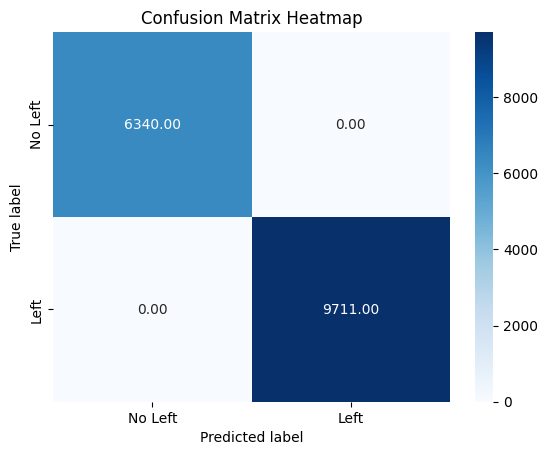

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics


tree_cm = metrics.confusion_matrix(tree_test_pred.actual,
                                   tree_test_pred.predicted,
                                   labels=[1, 0])
#confusion matrix heatmap
sns.heatmap(tree_cm, annot=True, fmt='.2f', cmap='Blues',
            xticklabels=["No Left", "Left"], yticklabels=["No Left", "Left"])

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix Heatmap')
plt.show()


## Decision trees without python package

In [ ]:

from collections import Counter

class Node:
    def __init__(self, feature=None, threshold=None, left=None, right=None, *, value=None):
        self.feature = feature         # Feature index for split
        self.threshold = threshold     # Threshold value for split
        self.left = left               # Left child Node
        self.right = right             # Right child Node
        self.value = value             # Value (for leaf nodes)

    def is_leaf_node(self):
        return self.value is not None  # Check if the node is a leaf


class DecisionTree:
    def __init__(self, min_samples_split=2, max_depth=100, n_features=None):
        self.min_samples_split = min_samples_split  # Minimum samples required to split a node
        self.max_depth = max_depth                  # Maximum depth of the tree
        self.n_features = n_features                # Number of features to consider for each split
        self.root = None                           # Root Node of the decision tree

    def fit(self, X, y):
        self.n_features = X.shape[1] if not self.n_features else min(X.shape[1], self.n_features)
        self.root = self._grow_tree(X, y)

    def _grow_tree(self, X, y, depth=0):
        n_samples, n_feats = X.shape
        n_labels = len(np.unique(y))

        # Stopping criteria for recursion
        if (depth >= self.max_depth or n_labels == 1 or n_samples < self.min_samples_split):
            leaf_value = self._most_common_label(y)
            return Node(value=leaf_value)


        feat_idxs = np.random.choice(n_feats, self.n_features, replace=False)
        best_feature, best_thresh = self._best_split(X, y, feat_idxs)

        # Recursively grow left and right subtrees
        left_idxs, right_idxs = self._split(X[:, best_feature], best_thresh)
        left = self._grow_tree(X[left_idxs, :], y[left_idxs], depth + 1)
        right = self._grow_tree(X[right_idxs, :], y[right_idxs], depth + 1)
        return Node(best_feature, best_thresh, left, right)

    def _best_split(self, X, y, feat_idxs):
        best_gain = -1
        split_idx, split_threshold = None, None

        # Iterate over selected features to find the best split
        for feat_idx in feat_idxs:
            X_column = X[:, feat_idx]
            thresholds = np.unique(X_column)

            for thr in thresholds:
                # Calculate information gain for each split
                gain = self._information_gain(y, X_column, thr)

                # Update best split if gain is better
                if gain > best_gain:
                    best_gain = gain
                    split_idx = feat_idx
                    split_threshold = thr

        return split_idx, split_threshold

    def _information_gain(self, y, X_column, threshold):
        # Calculate information gain based on entropy
        parent_entropy = self._entropy(y)

        left_idxs, right_idxs = self._split(X_column, threshold)

        if len(left_idxs) == 0 or len(right_idxs) == 0:
            return 0

        n = len(y)
        n_l, n_r = len(left_idxs), len(right_idxs)
        e_l, e_r = self._entropy(y[left_idxs]), self._entropy(y[right_idxs])
        child_entropy = (n_l / n) * e_l + (n_r / n) * e_r

        information_gain = parent_entropy - child_entropy
        return information_gain

    def _split(self, X_column, split_thresh):
        left_idxs = np.argwhere(X_column <= split_thresh).flatten()
        right_idxs = np.argwhere(X_column > split_thresh).flatten()
        return left_idxs, right_idxs

    def _entropy(self, y):
        y_int = y.astype(int)
        hist = np.bincount(y_int)
        ps = hist / len(y_int)
        return -np.sum([p * np.log(p) for p in ps if p > 0])

    def _most_common_label(self, y):
        counter = Counter(y)
        value = counter.most_common(1)[0][0]
        return value

    def predict(self, X):
        return np.array([self._traverse_tree(x, self.root) for x in X])

    def _traverse_tree(self, x, node):
        if node.is_leaf_node():
            return node.value

        if x[node.feature] <= node.threshold:
            return self._traverse_tree(x, node.left)
        return self._traverse_tree(x, node.right)


In [ ]:
# Ensure X_train, X_test, y_train, and y_test are numpy arrays
X_train = X_train.to_numpy() if hasattr(X_train, 'to_numpy') else X_train
X_test = X_test.to_numpy() if hasattr(X_test, 'to_numpy') else X_test
y_train = y_train.to_numpy() if hasattr(y_train, 'to_numpy') else y_train
y_test = y_test.to_numpy() if hasattr(y_test, 'to_numpy') else y_test

# Fit the model
clf = DecisionTree(max_depth=10)
clf.fit(X_train, y_train)

# Make predictions
predictions = clf.predict(X_test)

# Calculate accuracy
def accuracy(y_test, y_pred):
    return np.sum(y_test == y_pred) / len(y_test)

acc = accuracy(y_test, predictions)
print(acc)

0.8124556422995032


### **Classification Report of Decision Tree**

In [ ]:
# Calculate the metrics
classification_report = metrics.classification_report(y_test, y_pred, output_dict=True, zero_division=0)
report_df = pd.DataFrame(classification_report).transpose()

# Print the metrics
print("Classification Report:")
print(tabulate(report_df, headers='keys', tablefmt='pretty'))

Classification Report:
+--------------+---------------------+---------------------+---------------------+--------------------+
|              |      precision      |       recall        |      f1-score       |      support       |
+--------------+---------------------+---------------------+---------------------+--------------------+
|     0.0      | 0.6256208119826567  | 0.8172175883019257  | 0.7086979817824612  |       9711.0       |
|     1.0      | 0.5477228927883152  | 0.7238605898123325  | 0.6235925861770311  |       7460.0       |
|     2.0      |         0.0         |         0.0         |         0.0         |       2421.0       |
|     3.0      |         0.0         |         0.0         |         0.0         |       2885.0       |
|     4.0      |         0.0         |         0.0         |         0.0         |        67.0        |
|   accuracy   | 0.5915542938254081  | 0.5915542938254081  | 0.5915542938254081  | 0.5915542938254081 |
|  macro avg   | 0.23466874095419438 | 0.

# **Support Vector Machine**

## SVM with python package

In [ ]:
from sklearn.svm import LinearSVC

In [ ]:
svm_clf = LinearSVC(random_state=0, tol=1e-5)
svm_clf.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(random_state=0, tol=1e-05)

In [ ]:
y_pred=svm_clf.predict(X_test)
y_pred

array([1., 1., 0., ..., 1., 0., 2.])

In [ ]:
accuracy_score( y_test, y_pred )

0.815028388928318

### **Classification Report of Support Vector Machine**

In [ ]:
# Calculate the metrics
classification_report = metrics.classification_report(y_test, y_pred, output_dict=True, zero_division=0)
report_df = pd.DataFrame(classification_report).transpose()

# Print the metrics
print("Classification Report:")
print(tabulate(report_df, headers='keys', tablefmt='pretty'))

Classification Report:
+--------------+--------------------+--------------------+---------------------+-------------------+
|              |     precision      |       recall       |      f1-score       |      support      |
+--------------+--------------------+--------------------+---------------------+-------------------+
|     0.0      |        1.0         | 0.9754917104314694 | 0.9875938281901584  |      9711.0       |
|     1.0      | 0.8137939193185851 | 0.9221179624664879 | 0.8645761327216741  |      7460.0       |
|     2.0      | 0.4378518839324383 | 0.8351920693928129 | 0.5745134252024435  |      2421.0       |
|     3.0      |        0.0         |        0.0         |         0.0         |      2885.0       |
|     4.0      |        0.0         |        0.0         |         0.0         |       67.0        |
|   accuracy   | 0.815028388928318  | 0.815028388928318  |  0.815028388928318  | 0.815028388928318 |
|  macro avg   | 0.4503291606502047 | 0.546560348458154  | 0.4853366

In [ ]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline

model = SVC(kernel='rbf', class_weight='balanced',gamma='scale')

In [ ]:
model.fit(X_train, y_train)

SVC(class_weight='balanced')

In [ ]:
y_pred=model.predict(X_test)
y_pred

array([1., 1., 0., ..., 2., 0., 2.])

In [ ]:
accuracy_score( y_test, y_pred )

0.7109652235628106

In [ ]:
# Calculate the metrics
classification_report = metrics.classification_report(y_test, y_pred, output_dict=True, zero_division=0)
report_df = pd.DataFrame(classification_report).transpose()

# Print the metrics
print("Classification Report:")
print(tabulate(report_df, headers='keys', tablefmt='pretty'))

Classification Report:
+--------------+--------------------+--------------------+--------------------+--------------------+
|              |     precision      |       recall       |      f1-score      |      support       |
+--------------+--------------------+--------------------+--------------------+--------------------+
|     0.0      | 0.8667123690138087 | 0.9113376583256101 | 0.8884650135528561 |       9711.0       |
|     1.0      | 0.8936481786564159 | 0.6544235924932976 | 0.7555521163816451 |       7460.0       |
|     2.0      | 0.3342066957787482 | 0.9483684427922346 | 0.4942417393176192 |       2421.0       |
|     3.0      |        0.0         |        0.0         |        0.0         |       2885.0       |
|     4.0      |        0.0         |        0.0         |        0.0         |        67.0        |
|   accuracy   | 0.7109652235628106 | 0.7109652235628106 | 0.7109652235628106 | 0.7109652235628106 |
|  macro avg   | 0.4189134486897945 | 0.5028259387222285 | 0.4276517

##SVM without python package

In [ ]:


class SVM:
    def __init__(self, learning_rate=0.001, lambda_param=0.01, n_iters=1000):
        """
        Initialize the SVM classifier.

        Parameters:
        - learning_rate: float, learning rate for gradient descent (default: 0.001)
        - lambda_param: float, regularization parameter (default: 0.01)
        - n_iters: int, number of iterations for gradient descent (default: 1000)
        """
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None  # weights
        self.b = None  # bias

    def fit(self, X, y):
        """
        Fit the SVM classifier to the training data.

        Parameters:
        - X: numpy array, shape (n_samples, n_features), training samples
        - y: numpy array, shape (n_samples,), target values (-1 or 1)

        Returns:
        None
        """
        n_samples, n_features = X.shape

        # Convert labels to {-1, 1}
        y_ = np.where(y <= 0, -1, 1)

        # Initialize weights and bias
        self.w = np.zeros(n_features)
        self.b = 0

        # Gradient descent optimization
        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                # Check the hinge loss condition
                condition = y_[idx] * (np.dot(x_i, self.w) - self.b) >= 1
                if condition:
                    # Update weights for correct classification
                    self.w -= self.lr * (2 * self.lambda_param * self.w)
                else:
                    # Update weights and bias for misclassification
                    self.w -= self.lr * (2 * self.lambda_param * self.w - np.dot(x_i, y_[idx]))
                    self.b -= self.lr * y_[idx]

    def predict(self, X):
        """
        Predict class labels for samples in X.

        Parameters:
        - X: numpy array, shape (n_samples, n_features), samples to predict

        Returns:
        - numpy array, shape (n_samples,), predicted class labels (-1 or 1)
        """
        approx = np.dot(X, self.w) - self.b
        return np.sign(approx)


In [ ]:
    clf = SVM()
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)

    def accuracy(y_true, y_pred):
        accuracy = np.sum(y_true == y_pred) / len(y_true)
        return accuracy

    print("SVM classification accuracy", accuracy(y_test, predictions))

SVM classification accuracy 0.25323811213626685


### **Classification Report of Support Vector Machine without Python Package**

In [ ]:
# Calculate the metrics
classification_report = metrics.classification_report(y_test, y_pred, output_dict=True, zero_division=0)
report_df = pd.DataFrame(classification_report).transpose()

# Print the metrics
print("Classification Report:")
print(tabulate(report_df, headers='keys', tablefmt='pretty'))

Classification Report:
+--------------+--------------------+--------------------+--------------------+--------------------+
|              |     precision      |       recall       |      f1-score      |      support       |
+--------------+--------------------+--------------------+--------------------+--------------------+
|     0.0      | 0.8667123690138087 | 0.9113376583256101 | 0.8884650135528561 |       9711.0       |
|     1.0      | 0.8936481786564159 | 0.6544235924932976 | 0.7555521163816451 |       7460.0       |
|     2.0      | 0.3342066957787482 | 0.9483684427922346 | 0.4942417393176192 |       2421.0       |
|     3.0      |        0.0         |        0.0         |        0.0         |       2885.0       |
|     4.0      |        0.0         |        0.0         |        0.0         |        67.0        |
|   accuracy   | 0.7109652235628106 | 0.7109652235628106 | 0.7109652235628106 | 0.7109652235628106 |
|  macro avg   | 0.4189134486897945 | 0.5028259387222285 | 0.4276517

# **Logistic Regression**

## LR with python package

In [ ]:
lr_clf = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial').fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
y_pred=lr_clf.predict(X_test)
y_pred

array([1., 1., 0., ..., 1., 0., 2.])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8375177430801988

### **Classification Report of Logistic Regression**

In [ ]:
# Calculate the metrics
classification_report = metrics.classification_report(y_test, y_pred, output_dict=True, zero_division=0)
report_df = pd.DataFrame(classification_report).transpose()

# Print the metrics
print("Classification Report:")
print(tabulate(report_df, headers='keys', tablefmt='pretty'))

Classification Report:
+--------------+--------------------+--------------------+--------------------+--------------------+
|              |     precision      |       recall       |      f1-score      |      support       |
+--------------+--------------------+--------------------+--------------------+--------------------+
|     0.0      |        1.0         |        1.0         |        1.0         |       9711.0       |
|     1.0      | 0.7368205966489579 | 0.9667560321715818 | 0.8362708719851577 |       7460.0       |
|     2.0      | 0.6430213464696223 | 0.808756712102437  | 0.7164288327844859 |       2421.0       |
|     3.0      |        0.0         |        0.0         |        0.0         |       2885.0       |
|     4.0      |        0.0         |        0.0         |        0.0         |        67.0        |
|   accuracy   | 0.8375177430801988 | 0.8375177430801988 | 0.8375177430801988 | 0.8375177430801988 |
|  macro avg   | 0.4759683886237161 | 0.5551025488548038 | 0.5105399

## LR without python package

In [ ]:


def sigmoid(x):
    """
    Sigmoid function.

    Parameters:
    - x: numpy array or scalar, input to the sigmoid function

    Returns:
    - numpy array or scalar, sigmoid of x
    """
    return 1 / (1 + np.exp(-x))

class LogisticRegression:
    def __init__(self, lr=0.001, n_iters=1000):
        """
        Initialize the logistic regression model.

        Parameters:
        - lr: float, learning rate for gradient descent (default: 0.001)
        - n_iters: int, number of iterations for gradient descent (default: 1000)
        """
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None  # weights
        self.bias = None  # bias

    def fit(self, X, y):
        """
        Fit the logistic regression model to the training data.

        Parameters:
        - X: numpy array, shape (n_samples, n_features), training samples
        - y: numpy array, shape (n_samples,), target values (0 or 1)

        Returns:
        None
        """
        n_samples, n_features = X.shape

        # Initialize weights and bias
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Gradient descent optimization
        for _ in range(self.n_iters):
            linear_pred = np.dot(X, self.weights) + self.bias
            predictions = sigmoid(linear_pred)

            # Gradient calculations
            dw = (1/n_samples) * np.dot(X.T, (predictions - y))
            db = (1/n_samples) * np.sum(predictions - y)

            # Update weights and bias
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        """
        Predict class labels for samples in X.

        Parameters:
        - X: numpy array, shape (n_samples, n_features), samples to predict

        Returns:
        - list, predicted class labels (0 or 1)
        """
        linear_pred = np.dot(X, self.weights) + self.bias
        y_pred = sigmoid(linear_pred)
        # Convert predicted probabilities to class labels
        class_pred = [0 if y <= 0.5 else 1 for y in y_pred]
        return class_pred


In [ ]:
clf = LogisticRegression(lr=0.01)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

def accuracy(y_pred, y_test):
    return np.sum(y_pred==y_test)/len(y_test)

acc = accuracy(y_pred, y_test)
print(acc)

0.5915542938254081


### **Classification Report of Logistic without Python Package**

In [ ]:
# Calculate the metrics
classification_report = metrics.classification_report(y_test, y_pred, output_dict=True, zero_division=0)
report_df = pd.DataFrame(classification_report).transpose()

# Print the metrics
print("Classification Report:")
print(tabulate(report_df, headers='keys', tablefmt='pretty'))

Classification Report:
+--------------+---------------------+---------------------+---------------------+--------------------+
|              |      precision      |       recall        |      f1-score       |      support       |
+--------------+---------------------+---------------------+---------------------+--------------------+
|     0.0      | 0.6256208119826567  | 0.8172175883019257  | 0.7086979817824612  |       9711.0       |
|     1.0      | 0.5477228927883152  | 0.7238605898123325  | 0.6235925861770311  |       7460.0       |
|     2.0      |         0.0         |         0.0         |         0.0         |       2421.0       |
|     3.0      |         0.0         |         0.0         |         0.0         |       2885.0       |
|     4.0      |         0.0         |         0.0         |         0.0         |        67.0        |
|   accuracy   | 0.5915542938254081  | 0.5915542938254081  | 0.5915542938254081  | 0.5915542938254081 |
|  macro avg   | 0.23466874095419438 | 0.

## Combine Model Predictions Into Ensemble Predictions using Voting Ensemble



Voting-> Building multiple models (typically of differing types) and simple statistics (like calculating the mean) are used to combine predictions.

### Voting Ensemble

Voting is one of the simplest ways of combining the predictions from multiple machine learning algorithms.

It works by first creating two or more standalone models from your training dataset. A Voting Classifier can then be used to wrap your models and average the predictions of the sub-models when asked to make predictions for new data.

The predictions of the sub-models can be weighted, but specifying the weights for classifiers manually or even heuristically is difficult. More advanced methods can learn how to best weight the predictions from submodels, but this is called stacking (stacked generalization) and is currently not provided in scikit-learn.

In [ ]:
from sklearn import model_selection
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

In [ ]:
# Set random seed for reproducibility
seed = 7

# Create KFold cross-validation iterator
kfold = model_selection.KFold(n_splits=10, shuffle=True, random_state=seed)

# Create sub-models
estimators = []
model1 = LogisticRegression()
estimators.append(('logistic', model1))
model2 = DecisionTreeClassifier()
estimators.append(('cart', model2))
model3 = MLPClassifier()
estimators.append(('mlp', model3))

# Create the ensemble model
ensemble = VotingClassifier(estimators)

# Evaluate the ensemble model
results = model_selection.cross_val_score(ensemble, X_train, y_train, cv=kfold)
print(results.mean())

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

0.999015655657675


In [ ]:
ensemble.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


VotingClassifier(estimators=[('logistic', LogisticRegression()),
                             ('cart', DecisionTreeClassifier()),
                             ('mlp', MLPClassifier())])

In [ ]:
y_pred=ensemble.predict(X_test)
y_pred

array([1., 1., 0., ..., 1., 0., 2.])

In [ ]:
accuracy_score( y_test, y_pred )

0.8214602555003548

Classification Report for Voting Ensemble

In [ ]:
# Calculate the metrics
classification_report = metrics.classification_report(y_test, y_pred, output_dict=True, zero_division=0)
report_df = pd.DataFrame(classification_report).transpose()

# Print the metrics
print("Classification Report:")
print(tabulate(report_df, headers='keys', tablefmt='pretty'))

# Save Model

In [ ]:
import pickle
# Saving model
pickle.dump(lr_clf, open('model.pkl','wb'))

# Load Model and Predict

In [ ]:
import pickle
model=pickle.load(open('model.pkl', 'rb'))
model.predict([[1,0,0,229,0.06,0.00,0.04,10,0,0,21,0,0.04,0.00,0]])

array([1.])